In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as ml
import matplotlib.pyplot as plt
import seaborn as sns
ml.style.use('ggplot')

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix

In [ ]:
%cd C:\Users\hp\Downloads

In [2]:
data = pd.read_csv('2_breast-cancer-data.csv')
data.tail(20)

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
549  923465         B       10.820         24.21           68.89      361.6   
550  923748         B       10.860         21.48           68.51      360.5   
551  923780         B       11.130         22.44           71.49      378.4   
552  924084         B       12.770         29.43           81.35      507.9   
553  924342         B        9.333         21.94           59.01      264.0   
554  924632         B       12.880         28.92           82.50      514.3   
555  924934         B       10.290         27.61           65.67      321.4   
556  924964         B       10.160         19.59           64.73      311.7   
557  925236         B        9.423         27.88           59.26      271.3   
558  925277         B       14.590         22.68           96.39      657.1   
559  925291         B       11.510         23.93           74.52      403.5   
560  925292         B       14.050         27.15           91.38      600.4   
561  925311         B       11.200         29.37           70.67      386.0   
562  925622         M       15.220         30.62          103.40      716.9   
563  926125         M       20.920         25.09          143.00     1347.0   
564  926424         M       21.560         22.39          142.00     1479.0   
565  926682         M       20.130         28.25          131.20     1261.0   
566  926954         M       16.600         28.08          108.30      858.1   
567  927241         M       20.600         29.33          140.10     1265.0   
568   92751         B        7.760         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
549          0.08192           0.06602        0.015480              0.00816   
550          0.07431           0.04227        0.000000              0.00000   
551          0.09566           0.08194        0.048240              0.02257   
552          0.08276           0.04234        0.019970              0.01499   
553          0.09240           0.05605        0.039960              0.01282   
554          0.08123           0.05824        0.061950              0.02343   
555          0.09030           0.07658        0.059990              0.02738   
556          0.10030           0.07504        0.005025              0.01116   
557          0.08123           0.04971        0.000000              0.00000   
558          0.08473           0.13300        0.102900              0.03736   
559          0.09261           0.10210        0.111200              0.04105   
560          0.09929           0.11260        0.044620              0.04304   
561          0.07449           0.03558        0.000000              0.00000   
562          0.10480           0.20870        0.255000              0.09429   
563          0.10990           0.22360        0.317400              0.14740   
564          0.11100           0.11590        0.243900              0.13890   
565          0.09780           0.10340        0.144000              0.09791   
566          0.08455           0.10230        0.092510              0.05302   
567          0.11780           0.27700        0.351400              0.15200   
568          0.05263           0.04362        0.000000              0.00000   

     ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
549  ...        13.030          31.45            83.90       505.6   
550  ...        11.660          24.77            74.08       412.3   
551  ...        12.020          28.26            77.80       436.6   
552  ...        13.870          36.00            88.10       594.7   
553  ...         9.845          25.05            62.86       295.8   
554  ...        13.890          35.74            88.84       595.7   
555  ...        10.840          34.91            69.57       357.6   
556  ...        10.650          22.88            67.88       347.3   
557  ...        10.490          34.24            66.50     

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
data.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count     569.000000  ...    569.000000     569.000000       569.000000   
mean        0.181162  ...     16.269190      25.677223       107.261213   
std         0.027414  ...      4.833242       6.146258        33.602542   
min         0.106000  ...      7.930000      12.020000        50.410000   
25%         0.161900  ...     13.010000      21.080000        84.110000   
50%         0.179200  ...     14.970000      25.410000        97.660000   
75%         0.195700  ...     18.790000      29.720000       125.400000   
max         0.304000  ...     36.040000      49.540000       251.200000   

        area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count   569.000000        569.000000         569.000000       569.000000   
mean    880.583128          0.132369           0.254265         0.272188   
std     569.356993          0.022832           0.157336         0.208624   
min     185.200000          0.071170           0.027290         0.000000   
25%     515.300000          0.116600           0.147200         0.114500   
50%     686.500000          0.131300           0.211900         0.226700   
75%    1084.000000          0.146000           0.339100         0.382900   
max    4254.000000          0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 31 columns]

In [6]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [7]:
data['diagnosis'] = data['diagnosis'].replace('M',1)
data['diagnosis'] = data['diagnosis'].replace('B',0)
data.drop(columns=['id'],inplace=True)
data.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

In [8]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


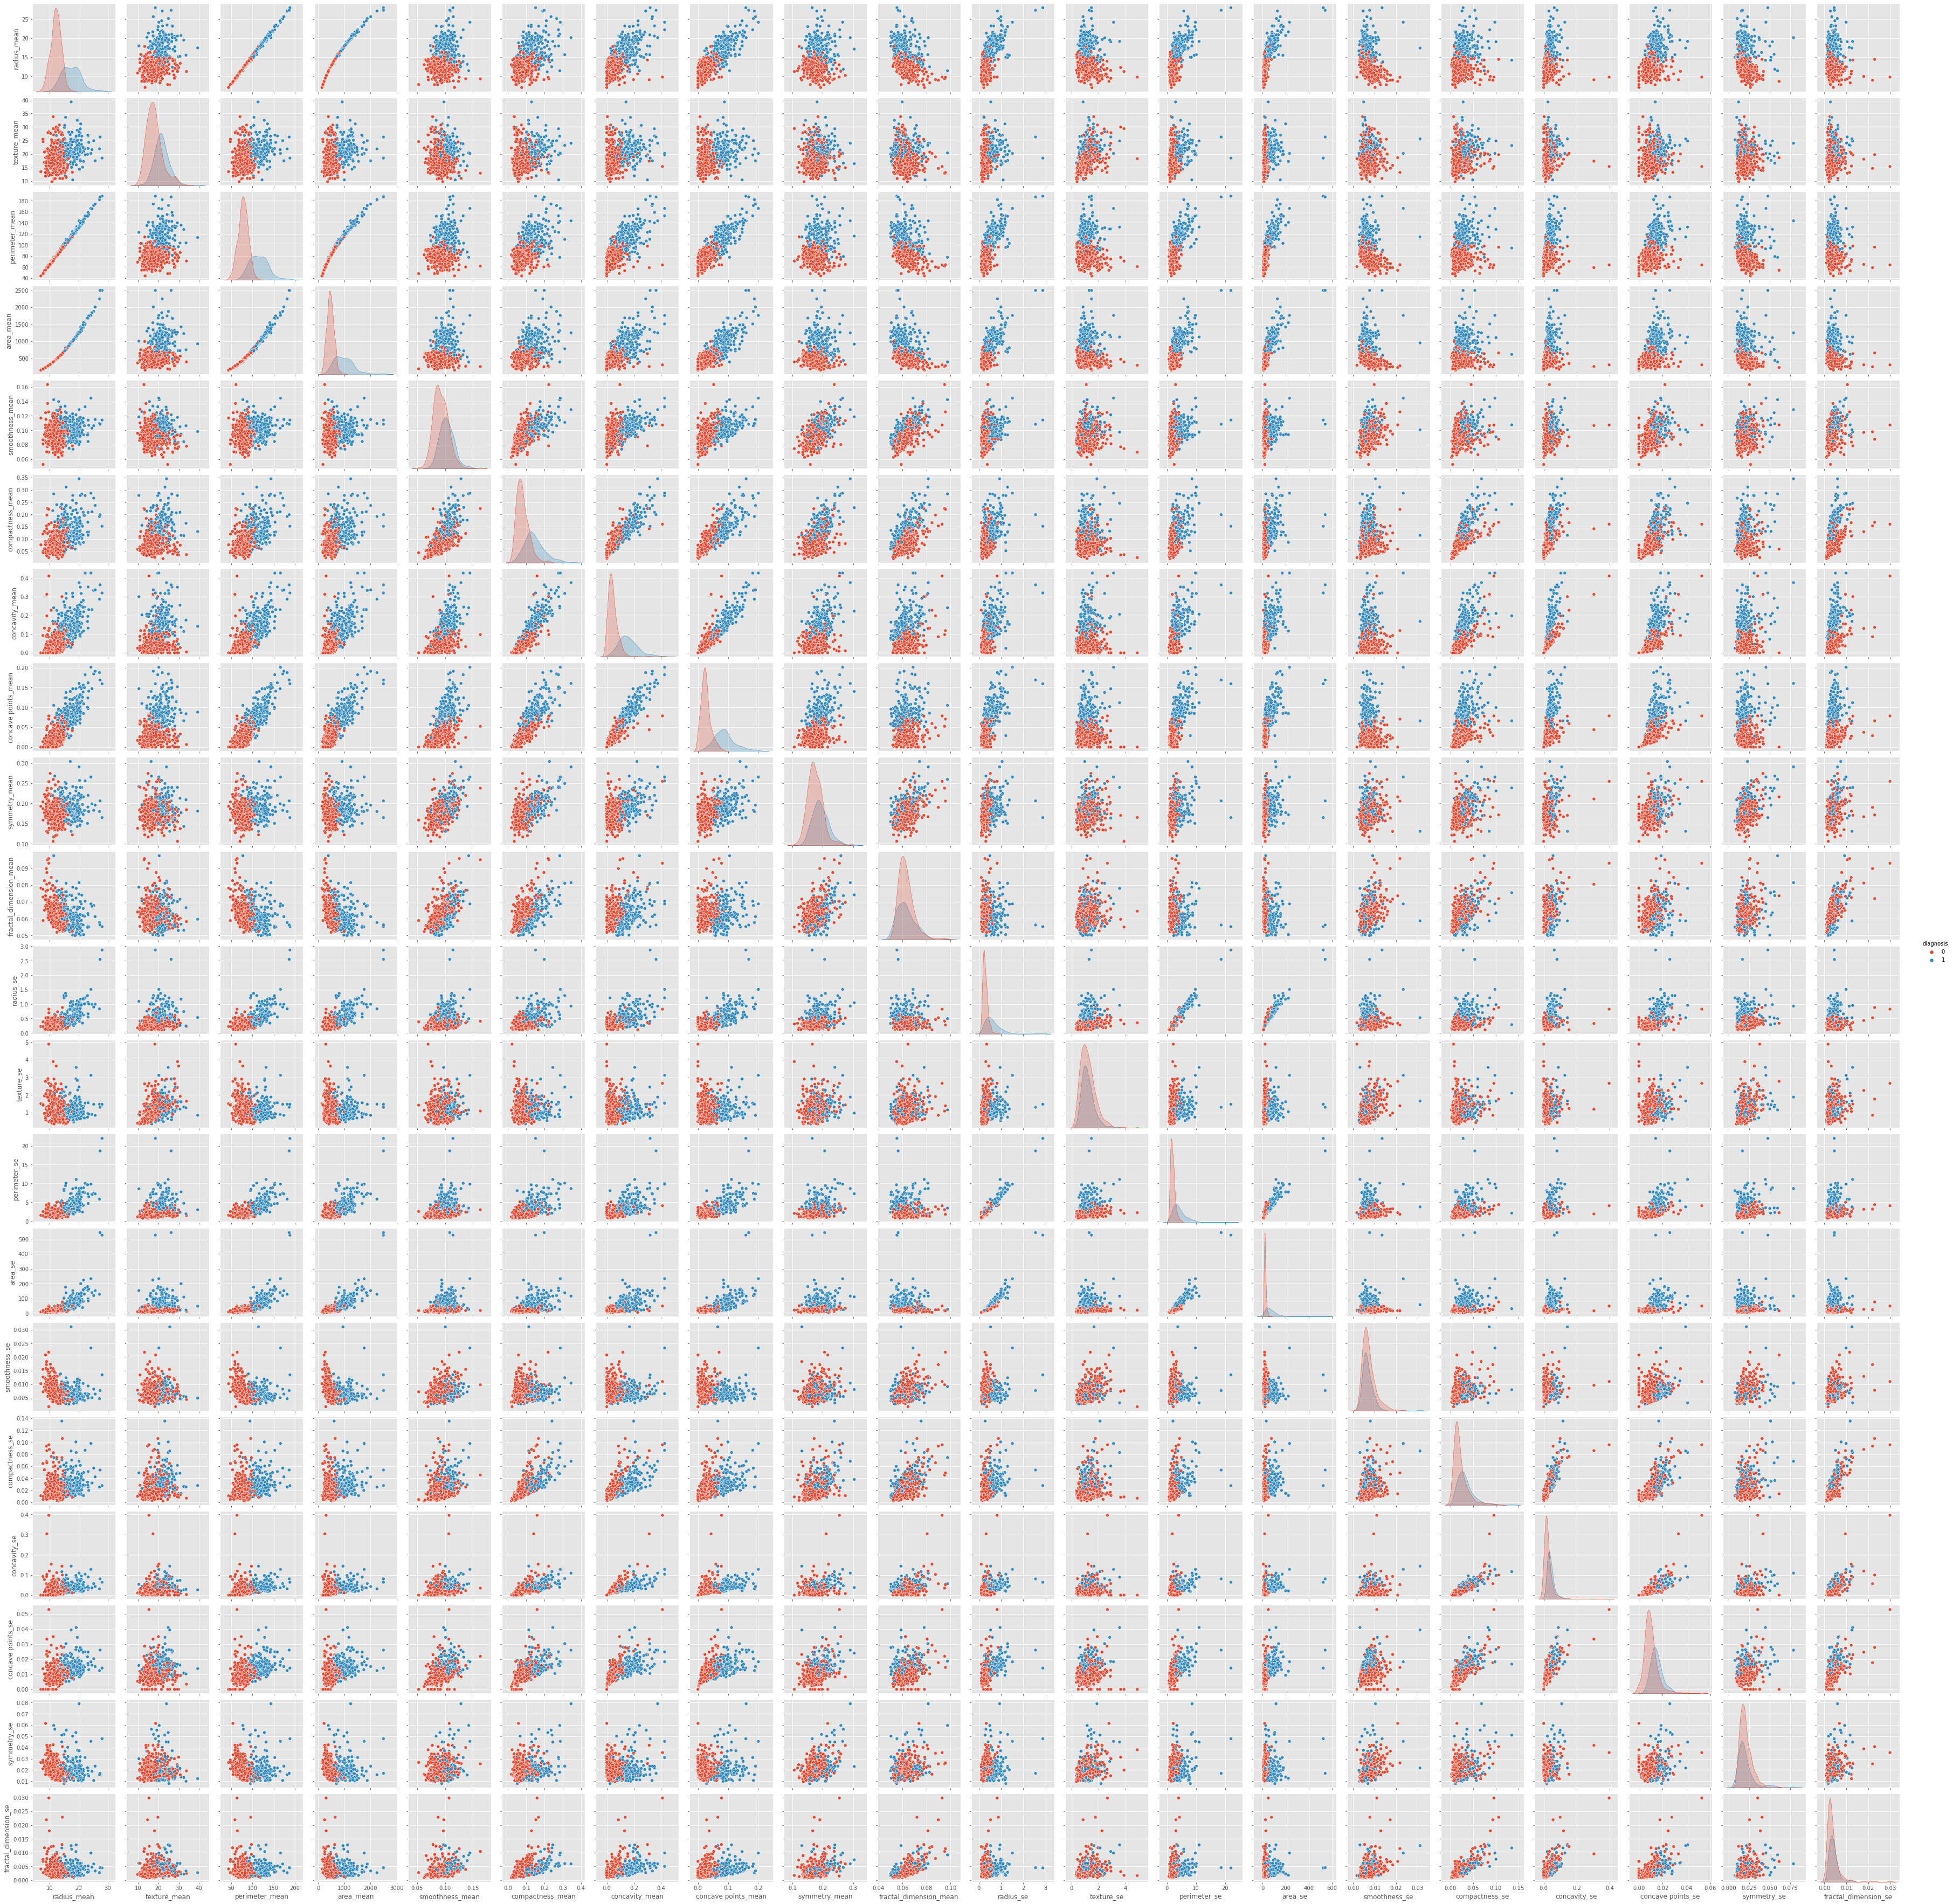

In [10]:
sns.pairplot(data.iloc[:,:21],'diagnosis')
plt.show()

## Building the model

In [11]:
X,Y = np.array(data.iloc[:,1:].values),np.array(data.iloc[:,0].values)
trainx,testx,trainy,testy = train_test_split(X,Y,test_size=0.2,random_state=0)
ss = StandardScaler()

In [ ]:

trainx2,testx2 = ss.fit_transform(trainx),ss.fit_transform(testx)
param_grid = [
    {'C':[0.1,1,10,100,1000],'kernel':['rbf','sigmoid'],'gamma':['scale','auto']},
    {'C':[0.1,1,10,100,1000],'kernel':['poly'],'degree':[2,3]}
]


In [ ]:
trainx2

In [ ]:
#Initial run(without tuning)
svm1,svm2 = SVC(),SVC()
svm1.fit(trainx,trainy)

In [ ]:
print("BEFORE SCALING THE FEATURES -->\n")
print("Initial accuracy score = {:.3f}".format(accuracy_score(testy,svm1.predict(testx))))
print("\nInitial recall score = {:.3f}".format(recall_score(testy,svm1.predict(testx))))
print("Initial confusion matrix :\n",confusion_matrix(testy,svm1.predict(testx)))
svm2.fit(trainx2,trainy)
print("\n\nAFTER SCALING THE FEATURES -->\n")
print("Initial accuracy score = {:.3f}".format(accuracy_score(testy,svm2.predict(testx2))))
print("\nInitial recall score = {:.3f}".format(recall_score(testy,svm2.predict(testx2))))
print("Initial confusion matrix :\n",confusion_matrix(testy,svm2.predict(testx2)))

In [ ]:
# Tuning the hyperparameters
svm_cv1,svm_cv2 = GridSearchCV(svm1,param_grid=param_grid,cv=10,n_jobs=-1),GridSearchCV(svm2,param_grid=param_grid,cv=10,n_jobs=-1)
svm_cv1.fit(trainx,trainy)
print("AFTER TUNING THE HYPERPARAMETERS : \n")
print("-"*100)
print("BEFORE SCALING THE FEATURES -->\n")
print("Accuracy score = {:.3f}".format(accuracy_score(testy,svm_cv1.predict(testx))))
print("\nRecall score = {:.3f}".format(recall_score(testy,svm_cv1.predict(testx))))
print("Confusion matrix :\n",confusion_matrix(testy,svm_cv1.predict(testx)))
print("\nThe best hyperparameters and accuracy score are : {} and {:.3f} respectively".format(svm_cv1.best_params_,svm_cv1.best_score_))
svm_cv2.fit(trainx2,trainy)
print("AFTER SCALING THE FEATURES -->\n")
print("Accuracy score = {:.3f}".format(accuracy_score(testy,svm_cv2.predict(testx2))))
print("\nRecall score = {:.3f}".format(recall_score(testy,svm_cv2.predict(testx2))))
print("Confusion matrix :\n",confusion_matrix(testy,svm_cv2.predict(testx2)))
print("\nThe best hyperparameters and accuracy score are : {} and {:.3f} respectively".format(svm_cv2.best_params_,svm_cv2.best_score_))